# Подключение основных библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ccxt

#sns.set_theme()
%matplotlib inline

In [2]:
import random

random.seed(0)
np.random.seed()

# Получение данных о котировке BTC/USDT c биржи OKX

## Считывание данных с биржи

In [3]:
# Биржа из которой будут браться данные с помощью CCXT
EXCHANGE = ccxt.okx()
# Инструмент в формате символа для обработки
SYMBOL = "BTC/USDT"
# Таймфрейм свеч
TIMEFRAME = "1h"

In [4]:
from_ts = EXCHANGE.parse8601('2018-01-10 00:00:00')

ohlcv_list = []
ohlcv = EXCHANGE.fetch_ohlcv(symbol=SYMBOL, timeframe=TIMEFRAME, since=from_ts, limit=100)
ohlcv_list.append(ohlcv)

while True:
    from_ts = ohlcv[-1][0]
    new_ohlcv = EXCHANGE.fetch_ohlcv(symbol=SYMBOL, timeframe=TIMEFRAME, since=from_ts, limit=100)
    ohlcv.extend(new_ohlcv)

    print(f"\r{EXCHANGE.iso8601(from_ts)}", end="")
    
    if len(new_ohlcv) <= 1:
    	break

2024-09-14T19:00:00.000Z

In [5]:
ohlcv = pd.DataFrame(ohlcv, columns=["Date", "Open", "High", "Low", "Close", "Volume"])
ohlcv["Date"] = ohlcv["Date"].apply(lambda x: datetime.datetime.fromtimestamp(x / 1000))

In [6]:
ohlcv

Date     Open     High      Low    Close      Volume
0     2018-01-11 11:00:00  13356.7  13554.5  13133.5  13463.5  399.179267
1     2018-01-11 12:00:00  13467.0  13891.5  13454.9  13806.3  443.203516
2     2018-01-11 13:00:00  13806.3  13868.1  13668.7  13784.2  375.978845
3     2018-01-11 14:00:00  13785.8  13970.9  13680.3  13969.7  450.622312
4     2018-01-11 15:00:00  13977.6  14284.0  13868.1  13983.5  542.888459
...                   ...      ...      ...      ...      ...         ...
59108 2024-09-14 16:00:00  59875.3  59988.0  59834.3  59984.0  123.256161
59109 2024-09-14 17:00:00  59980.1  59984.0  59840.0  59889.9   82.712639
59110 2024-09-14 18:00:00  59888.0  59900.4  59355.9  59783.3  530.482960
59111 2024-09-14 19:00:00  59783.4  59905.4  59731.4  59838.1   23.731460
59112 2024-09-14 19:00:00  59783.4  59905.4  59731.4  59838.1   23.731460

[59113 rows x 6 columns]

In [7]:
ohlcv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59113 entries, 0 to 59112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    59113 non-null  datetime64[ns]
 1   Open    59113 non-null  float64       
 2   High    59113 non-null  float64       
 3   Low     59113 non-null  float64       
 4   Close   59113 non-null  float64       
 5   Volume  59113 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.7 MB


## Удаление дубликатов данных

In [8]:
ohlcv = ohlcv.drop_duplicates()

In [9]:
ohlcv.shape

(58521, 6)

## Поиск отсутсвующих значений

In [10]:
ohlcv.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Анализ данных данных

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import t

In [12]:
ohlc = ohlcv[["Open", "High", "Low", "Close"]]
returns = ohlcv["Close"].diff()
log_returns = np.log(ohlcv["Close"]).diff()
ptc_returns = ohlcv["Close"].pct_change()

## Линейная визуализация

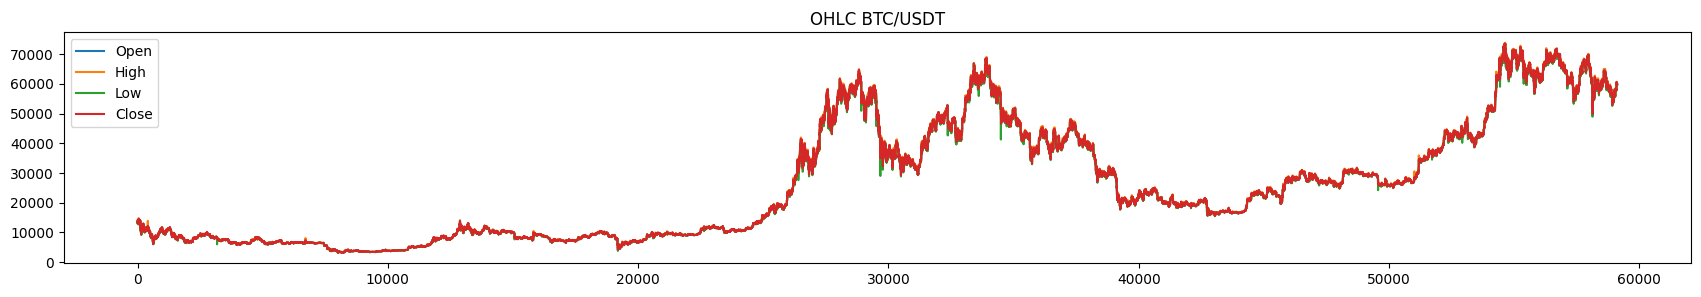

In [13]:
ohlc.plot(figsize=(21, 3), title="OHLC BTC/USDT")
plt.show()

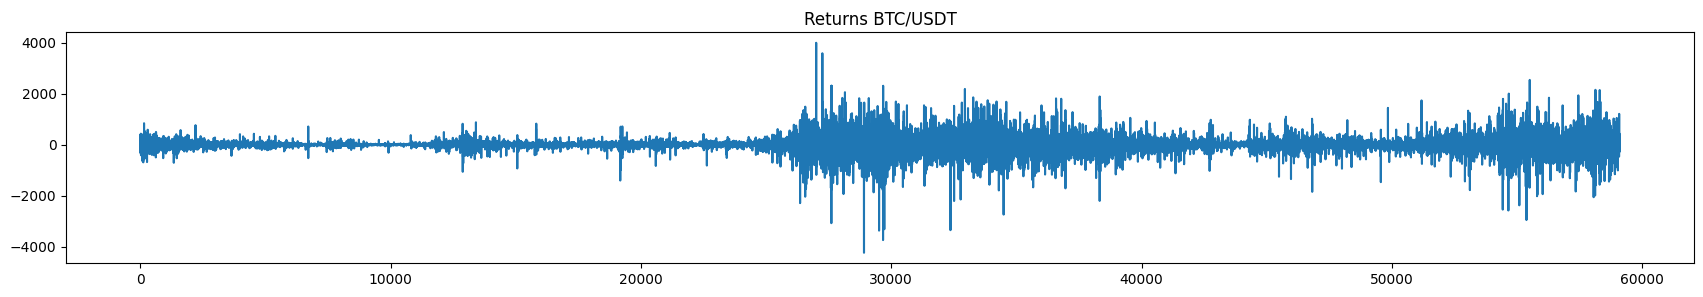

In [14]:
returns.plot(figsize=(21, 3), title="Returns BTC/USDT")
plt.show()

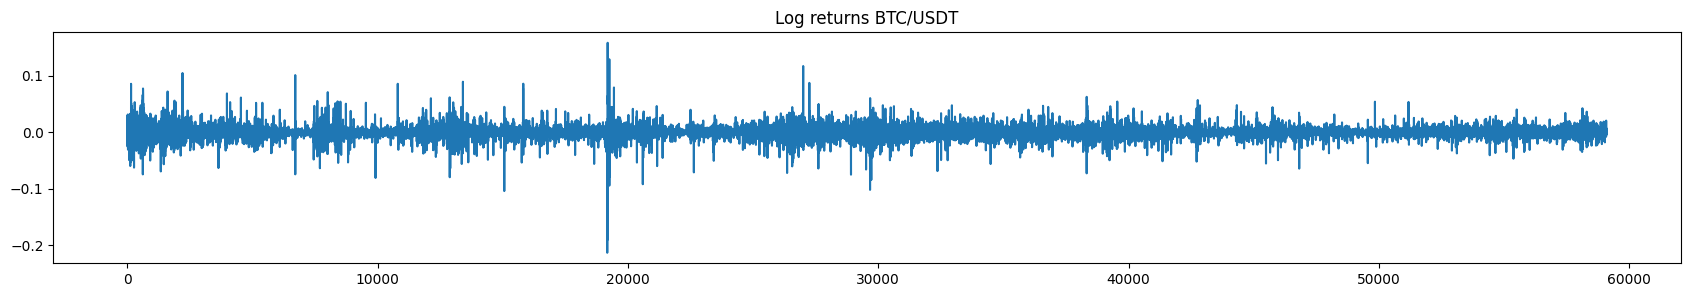

In [15]:
log_returns.plot(figsize=(21, 3), title="Log returns BTC/USDT")
plt.show()

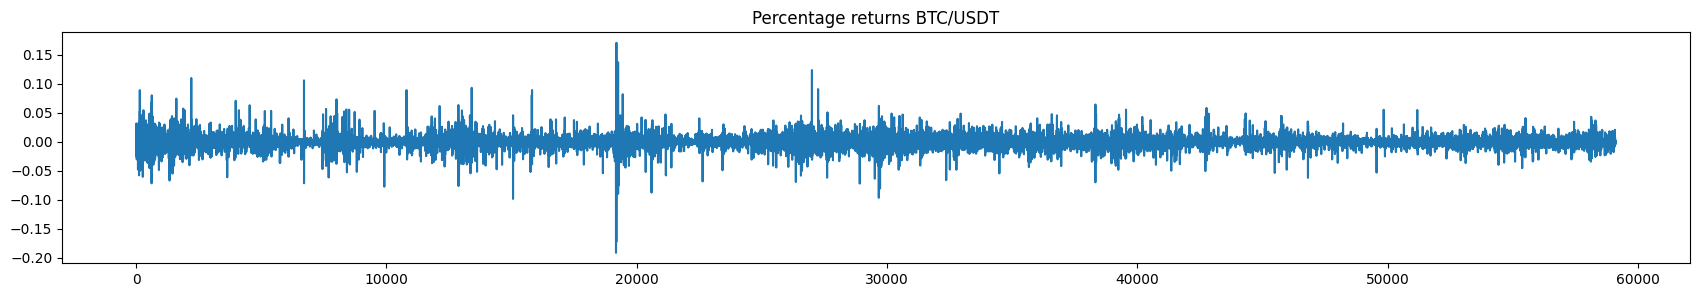

In [16]:
ptc_returns.plot(figsize=(21, 3), title="Percentage returns BTC/USDT")
plt.show()

## Гистограммы данных

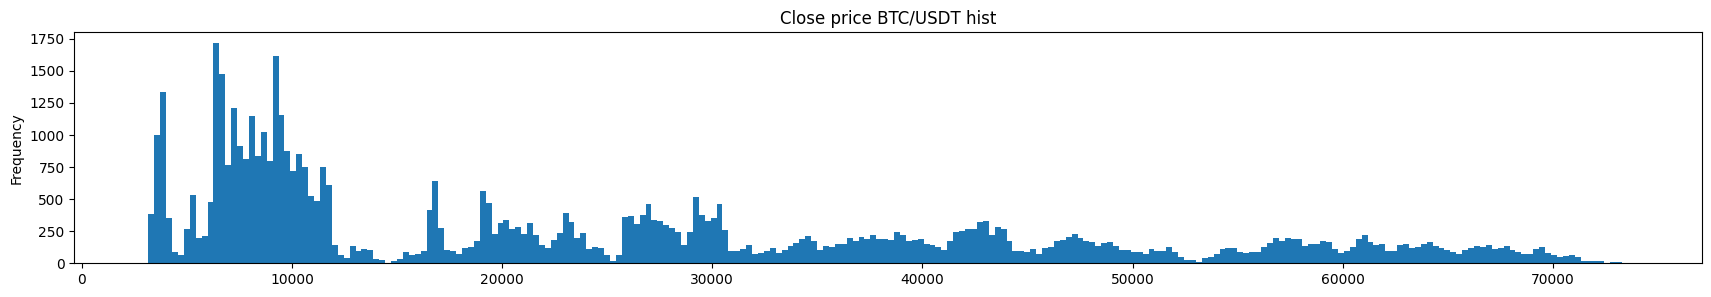

Close Mean: 25782.204230959826
Close STD: 19375.22480861376
Close Skew: 0.706947178713326
Close Kurtosis: -0.7259987816909668
Close Excess kurtosis: -3.7259987816909668


In [17]:
ohlc["Close"].plot(kind="hist", figsize=(21, 3), title="Close price BTC/USDT hist", bins=250)
plt.show()

print(f"Close Mean: {ohlc['Close'].mean()}")
print(f"Close STD: {ohlc['Close'].std()}")
print(f"Close Skew: {ohlc['Close'].skew()}")
print(f"Close Kurtosis: {ohlc['Close'].kurtosis()}")
print(f"Close Excess kurtosis: {ohlc['Close'].kurtosis() - 3}")

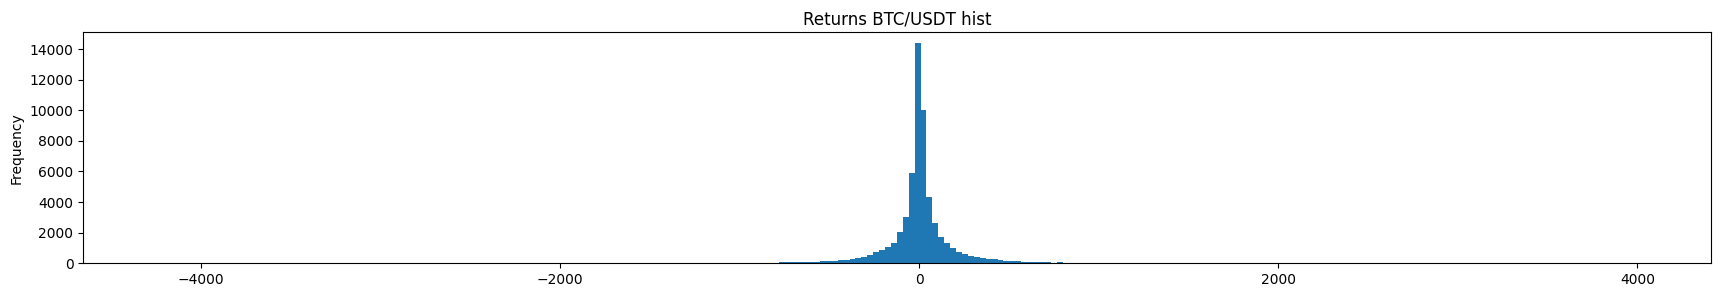

Returns Mean: 0.7924572795625427
Returns STD: 221.52196898552205
Returns Skew: -0.45866526460156115
Returns Kurtosis: 26.742995585950446
Returns Excess kurtosis: 23.742995585950446


In [18]:
returns.plot(kind="hist", figsize=(21, 3), title="Returns BTC/USDT hist", bins=250)
plt.show()

print(f"Returns Mean: {returns.mean()}")
print(f"Returns STD: {returns.std()}")
print(f"Returns Skew: {returns.skew()}")
print(f"Returns Kurtosis: {returns.kurtosis()}")
print(f"Returns Excess kurtosis: {returns.kurtosis() - 3}")

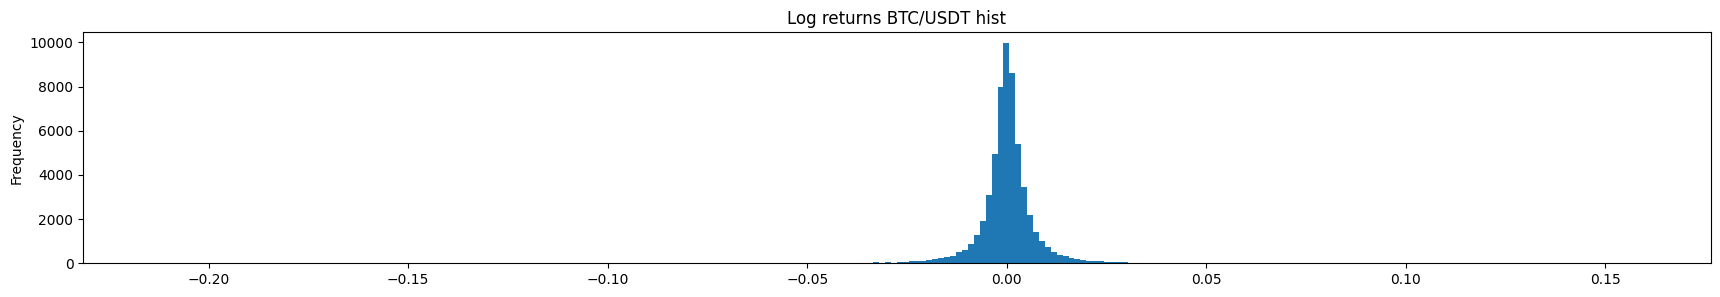

Log returns Mean: 2.5489751566863346e-05
Log returns STD: 0.007547320620281223
Log returns Skew: -0.5614073441583808
Log returns Kurtosis: 40.58980989826621
Log returns Excess kurtosis: 37.58980989826621


In [19]:
log_returns.plot(kind="hist", figsize=(21, 3), title="Log returns BTC/USDT hist", bins=250)
plt.show()

print(f"Log returns Mean: {log_returns.mean()}")
print(f"Log returns STD: {log_returns.std()}")
print(f"Log returns Skew: {log_returns.skew()}")
print(f"Log returns Kurtosis: {log_returns.kurtosis()}")
print(f"Log returns Excess kurtosis: {log_returns.kurtosis() - 3}")

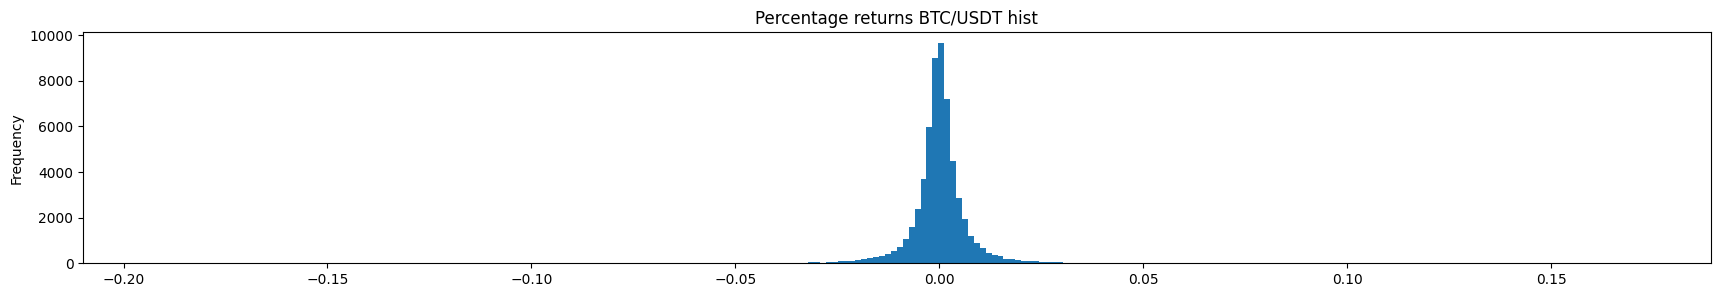

Log returns Mean: 5.393693217264369e-05
Log returns STD: 0.007536786176888424
Log returns Skew: -0.1024486113945678
Log returns Kurtosis: 36.785870791495014
Log returns Excess kurtosis: 33.785870791495014


In [20]:
ptc_returns.plot(kind="hist", figsize=(21, 3), title="Percentage returns BTC/USDT hist", bins=250)
plt.show()

print(f"Log returns Mean: {ptc_returns.mean()}")
print(f"Log returns STD: {ptc_returns.std()}")
print(f"Log returns Skew: {ptc_returns.skew()}")
print(f"Log returns Kurtosis: {ptc_returns.kurtosis()}")
print(f"Log returns Excess kurtosis: {ptc_returns.kurtosis() - 3}")

## Box plot

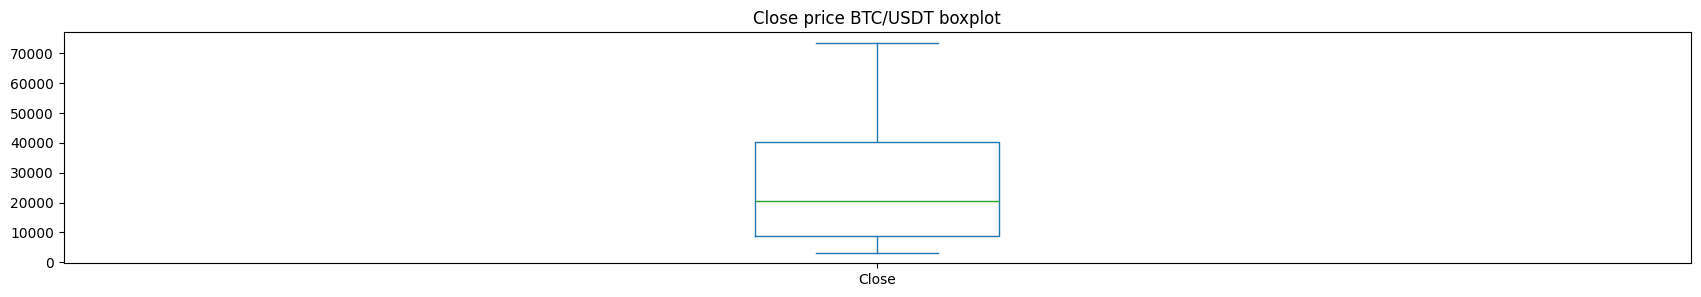

In [21]:
ohlc["Close"].plot(kind="box", figsize=(21, 3), title="Close price BTC/USDT boxplot")
plt.show()

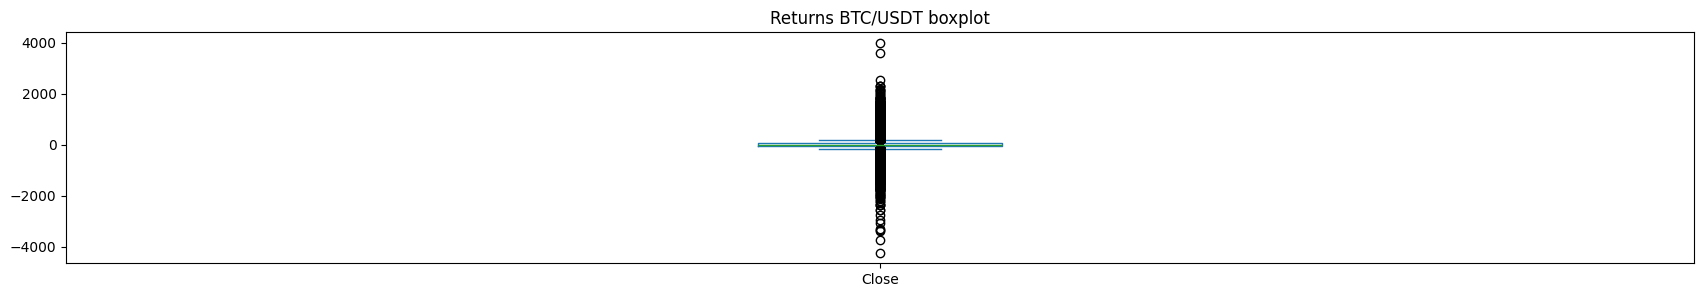

In [22]:
returns.plot(kind="box", figsize=(21, 3), title="Returns BTC/USDT boxplot")
plt.show()

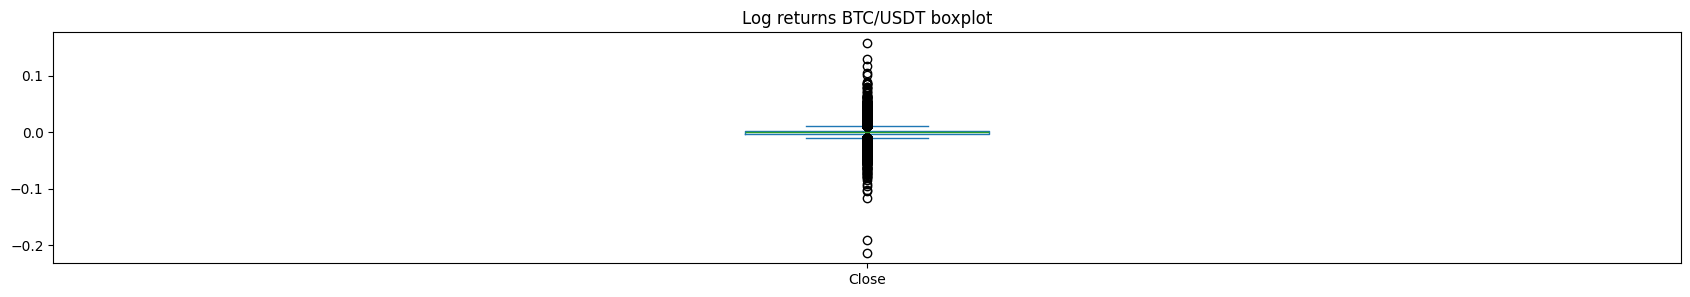

In [23]:
log_returns.plot(kind="box", figsize=(21, 3), title="Log returns BTC/USDT boxplot")
plt.show()

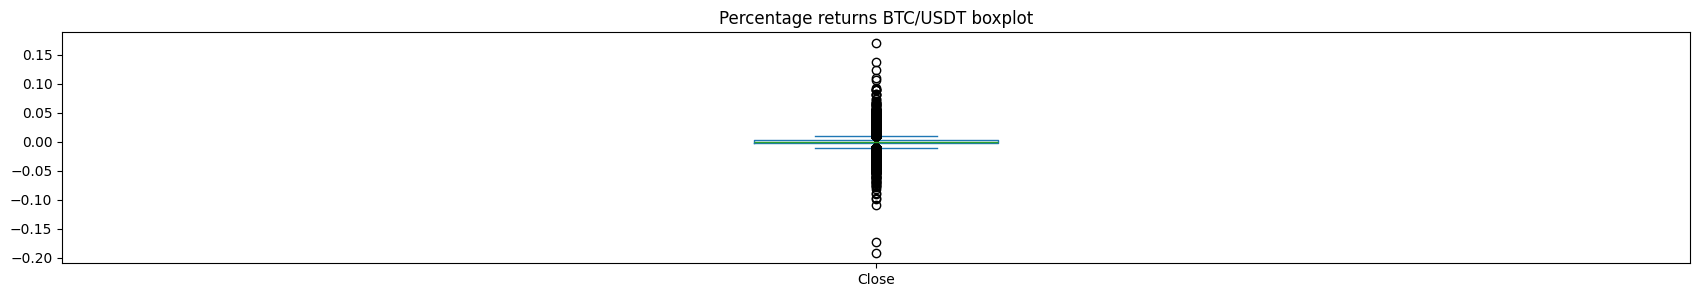

In [24]:
ptc_returns.plot(kind="box", figsize=(21, 3), title="Percentage returns BTC/USDT boxplot")
plt.show()

## Проверка нормальности и стационарности Log returns BTC/USDT

In [25]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Test:")
    print(f"\tADF Statistic: {result[0]}")
    print(f"\tp-value: {result[1]}")
    for key, value in result[4].items():
        print(f"\tCritical Value {key}: {value}")
    if result[1] < 0.05:
        print("\tВременной ряд стационарен (отвергаем H0)\n")
    else:
        print("\tВременной ряд не стационарен (не отвергаем H0)\n")

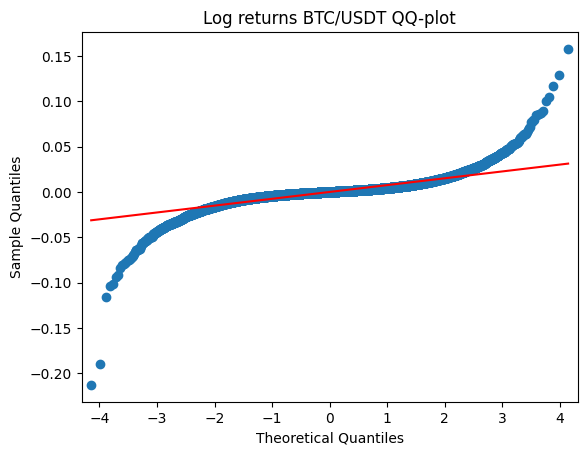

ADF Test:
	ADF Statistic: -33.81002329181797
	p-value: 0.0
	Critical Value 1%: -3.4304618489963814
	Critical Value 5%: -2.861589435117114
	Critical Value 10%: -2.5667963126503963
	Временной ряд стационарен (отвергаем H0)



In [26]:
qqplot(log_returns.dropna(), line="s")
plt.title("Log returns BTC/USDT QQ-plot")
plt.show()

adf_test(log_returns.dropna())

## Подбор параметров для подгонки распределения Log returns под t-распределение  Стьюдента

In [27]:
# Подгонка данных
df, loc, scale = t.fit(log_returns.dropna())

In [28]:
print(f"Степень свободы: {df}")
print(f"Среднее: {loc}")
print(f"Стандартное отклонение: {scale}")

Степень свободы: 1.8811855753249778
Среднее: 7.298404587989323e-05
Стандартное отклонение: 0.003160500095563264


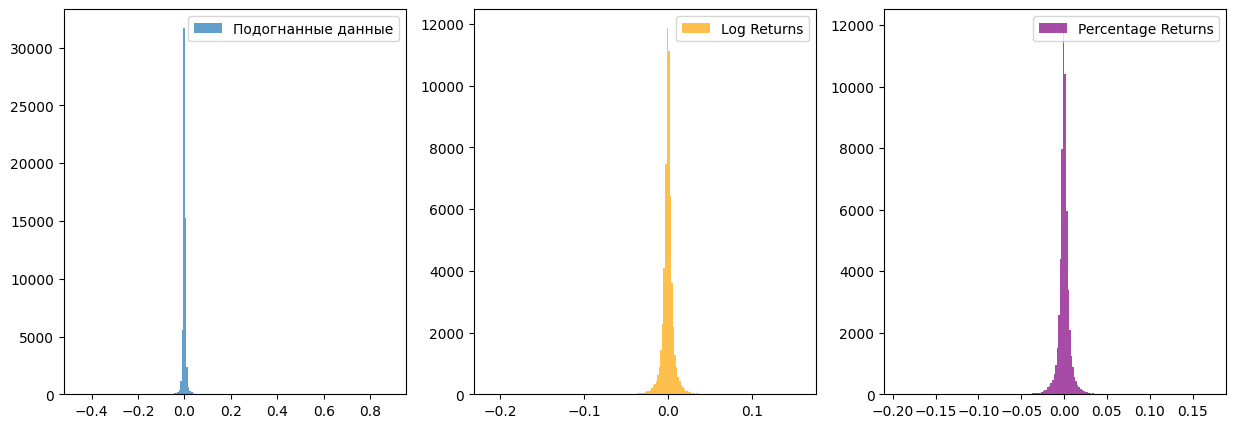

In [29]:
# Генерируйте случайные числа из t-распределения:
random_samples = t.rvs(df, loc=loc, scale=scale, size=log_returns.shape[0])

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].hist(random_samples, bins=200, alpha=0.7, label='Подогнанные данные')
ax[0].legend()
ax[1].hist(log_returns, bins=200, alpha=0.7, color="orange", label='Log Returns')
ax[1].legend()
ax[2].hist(ptc_returns, bins=200, alpha=0.7, color="purple", label='Percentage Returns')
ax[2].legend()
plt.show()

## Визуализации распределения

In [30]:
from scipy import stats

/tmp/ipykernel_3996/763094357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns, norm_hist=True, fit=stats.norm,


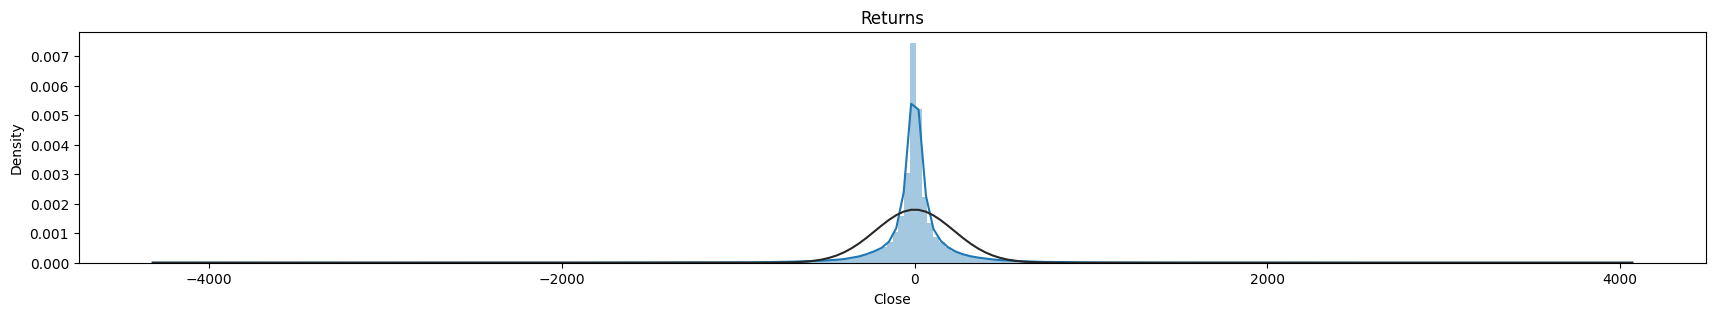

In [31]:
fig, ax = plt.subplots(figsize=(21,3))
sns.distplot(returns, norm_hist=True, fit=stats.norm, 
             bins=250, ax=ax)
ax.set_title('Returns')
plt.show()

/tmp/ipykernel_3996/1373788659.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_returns, norm_hist=True, fit=stats.norm,


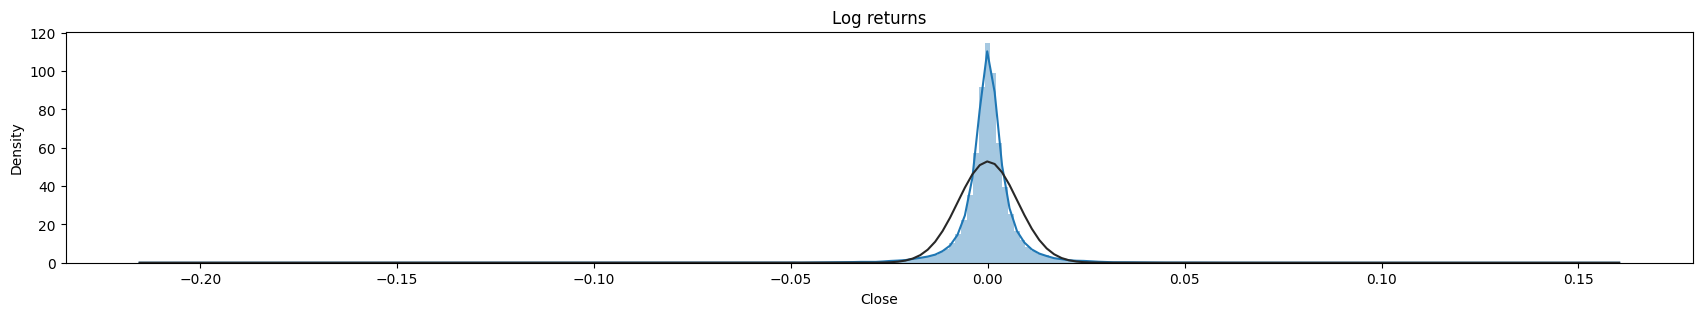

In [32]:
fig, ax = plt.subplots(figsize=(21,3))
sns.distplot(log_returns, norm_hist=True, fit=stats.norm, 
             bins=250, ax=ax)
ax.set_title('Log returns')
plt.show()

/tmp/ipykernel_3996/3482585300.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ptc_returns, norm_hist=True, fit=stats.norm,


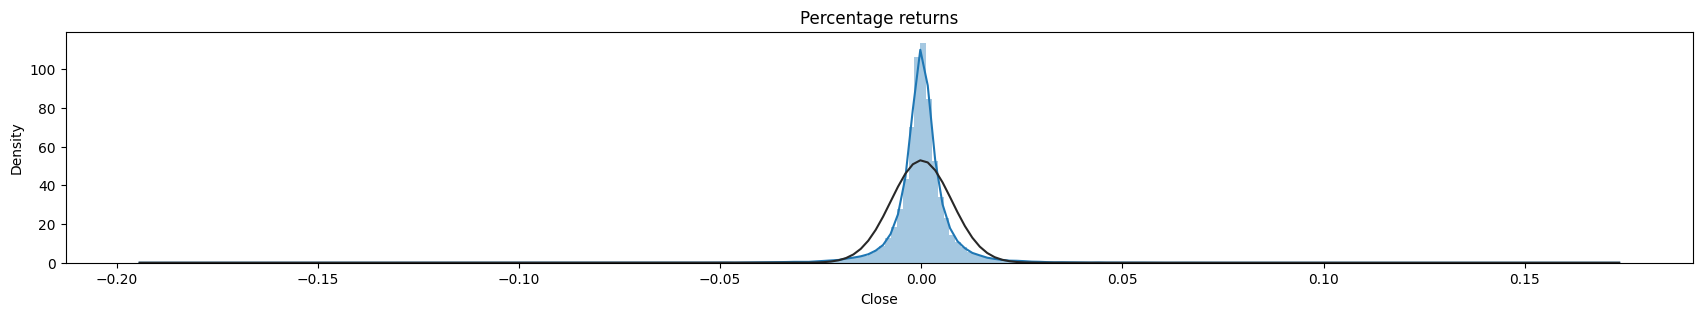

In [33]:
fig, ax = plt.subplots(figsize=(21,3))
sns.distplot(ptc_returns, norm_hist=True, fit=stats.norm, 
             bins=250, ax=ax)
ax.set_title('Percentage returns')
plt.show()

## ACF, PACF

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

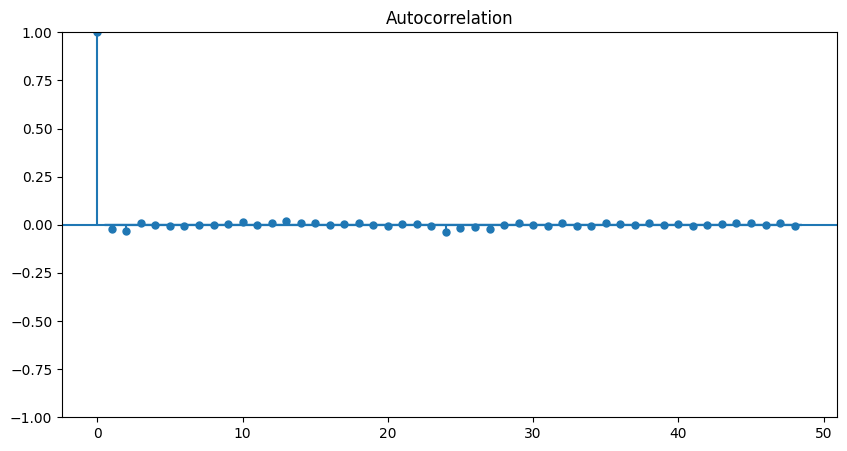

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(log_returns.dropna(), ax=ax)
plt.show()

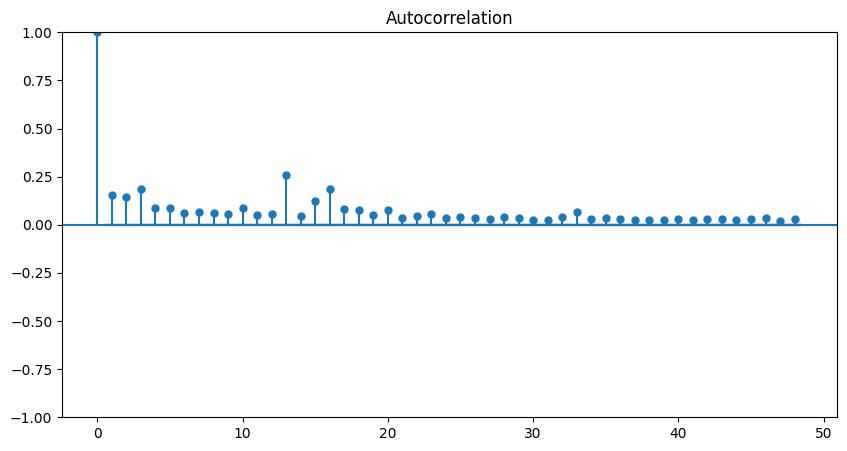

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(log_returns.dropna() ** 2, ax=ax)
plt.show()

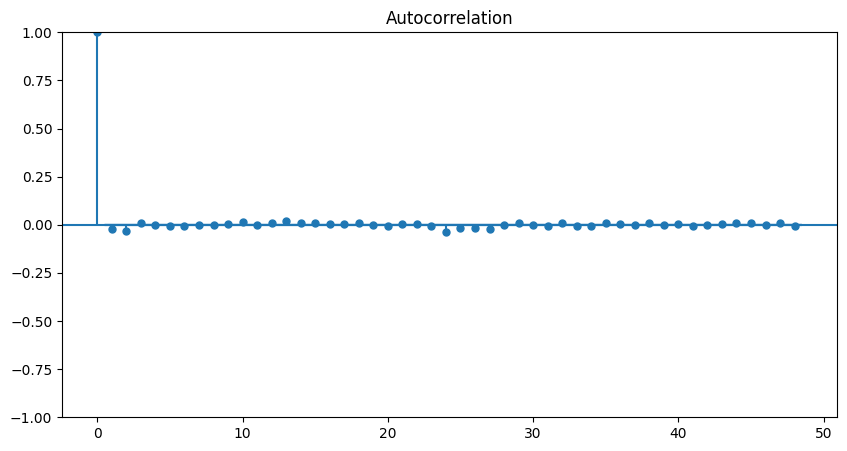

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ptc_returns.dropna(), ax=ax)
plt.show()

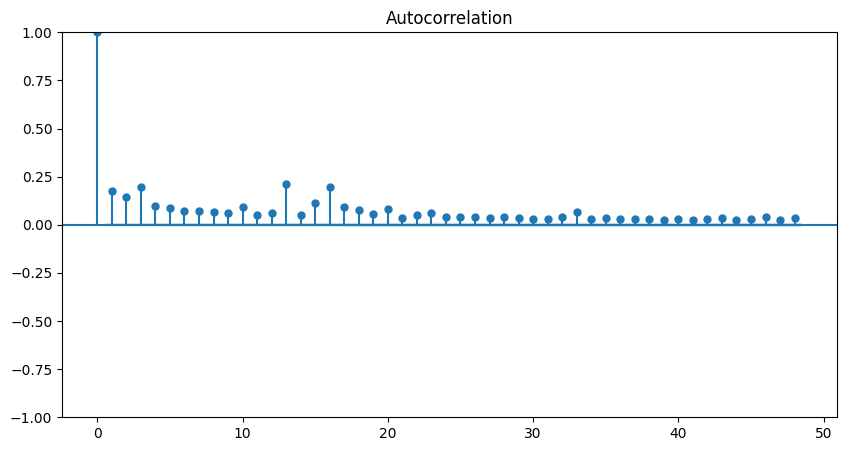

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ptc_returns.dropna() ** 2, ax=ax)
plt.show()

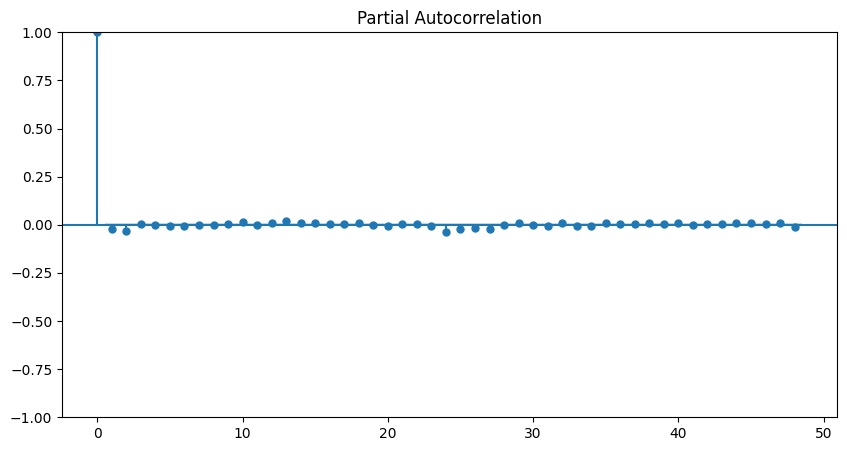

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(log_returns.dropna(), ax=ax)
plt.show()

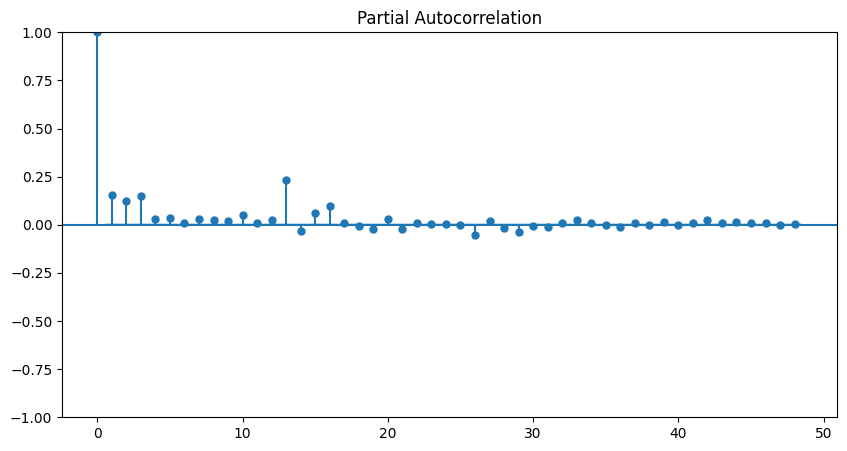

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(log_returns.dropna() ** 2, ax=ax)
plt.show()

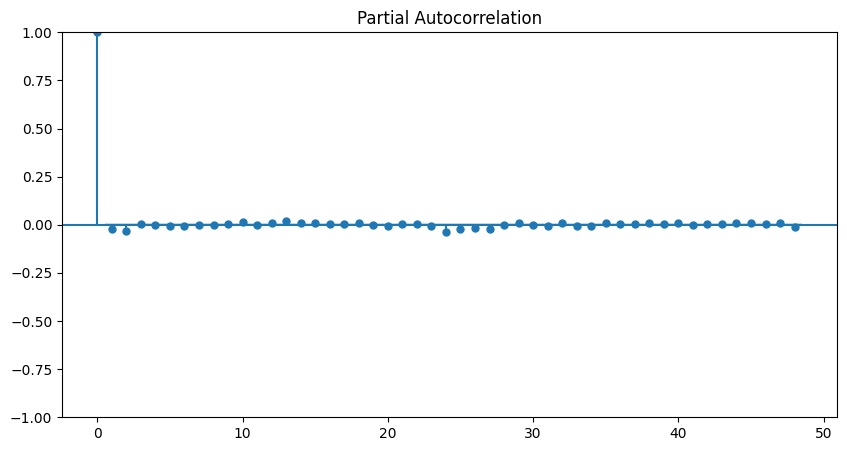

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ptc_returns.dropna(), ax=ax)
plt.show()

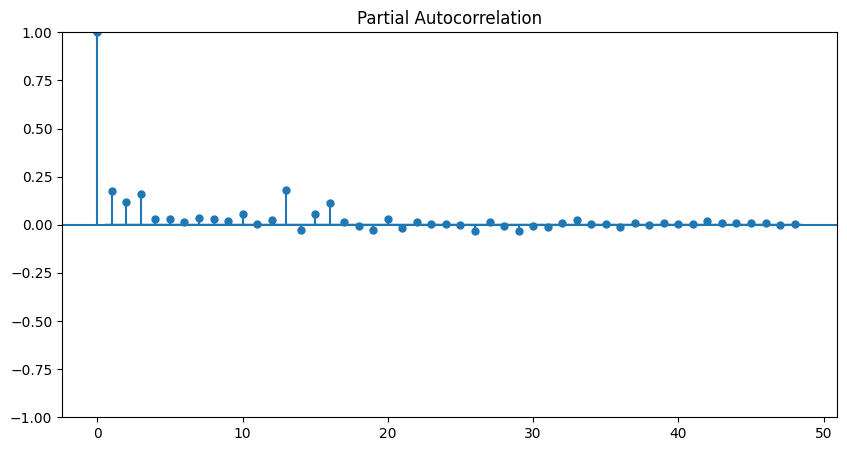

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ptc_returns.dropna() ** 2, ax=ax)
plt.show()

## Ljung-Box Test

Ho : Данные распределены независимо, автокорреляция отсутствует

Ha : Данные не являются независимо распределенными; в них наблюдается серийная корреляция

In [43]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [44]:
ljung_res = acorr_ljungbox(log_returns.dropna(), lags=50, boxpierce=True)
p = 0.05

ljung_res.head()

lb_stat     lb_pvalue    bp_stat     bp_pvalue
1  28.378317  9.977658e-08  28.376863  9.985159e-08
2  82.256733  1.374603e-18  82.251596  1.378139e-18
3  85.409342  2.119767e-18  85.403936  2.125439e-18
4  85.416441  1.237709e-17  85.411034  1.240983e-17
5  86.653462  3.387539e-17  86.647907  3.396643e-17

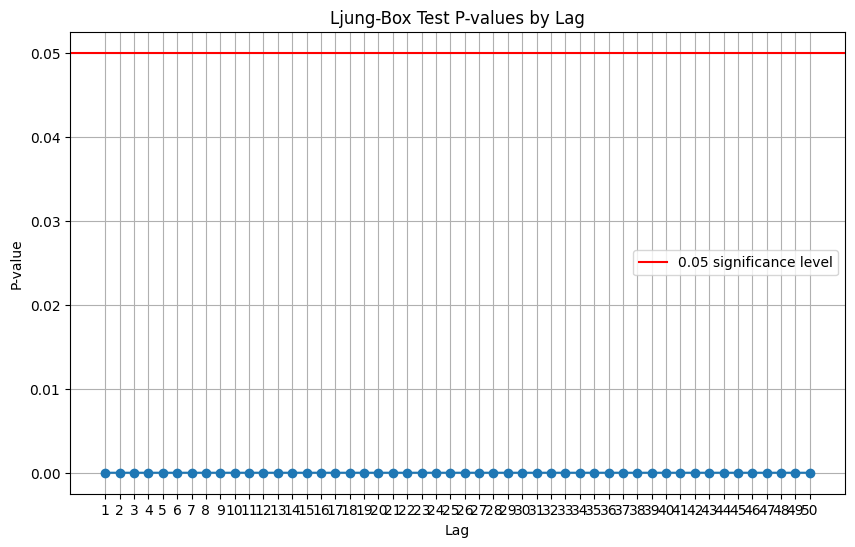

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(ljung_res.index, ljung_res["lb_pvalue"], marker="o", linestyle="-")
plt.axhline(y=0.05, color="r", linestyle="-", label="0.05 significance level")
plt.title("Ljung-Box Test P-values by Lag")
plt.xlabel("Lag")
plt.ylabel("P-value")
plt.xticks(ticks=np.arange(1, 50 + 1))
plt.grid(True)
plt.legend()
plt.show()

Отклоняем нулевую гипотезу

## Вывод !TODO

# Моделирование

In [46]:
from statsforecast import StatsForecast
from statsforecast.models import ARCH, GARCH, Naive
from datasetsforecast import losses

import lightgbm as lgb
from sklearn.linear_model import LinearRegression

import optuna

from IPython.display import display

In [47]:
import os
os.environ['NIXTLA_ID_AS_COL'] = '1'

## Создание датасетов

In [48]:
ohlcv["Return"] = ohlcv["Close"].diff()
ohlcv["LogReturn"] = np.log(ohlcv["Close"]).diff()
ohlcv["PctReturn"] = ohlcv["Close"].pct_change()
ohlcv["Vol"] = ohlcv["Close"].rolling(300).std(ddof=0)

/tmp/ipykernel_3996/2763199367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv["Return"] = ohlcv["Close"].diff()
/tmp/ipykernel_3996/2763199367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv["LogReturn"] = np.log(ohlcv["Close"]).diff()
/tmp/ipykernel_3996/2763199367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Убираем nan значения

In [49]:
ohlcv = ohlcv.dropna()

In [50]:
ohlcv

Date     Open     High      Low    Close      Volume  \
302   2018-01-23 22:00:00  10980.8  11173.5  10980.8  11037.0  273.183777   
303   2018-01-23 23:00:00  11037.0  11062.5  10753.2  10813.9  581.103111   
304   2018-01-24 00:00:00  10813.9  10891.0  10500.0  10586.4  461.756986   
305   2018-01-24 01:00:00  10586.4  10828.5  10513.0  10578.6  493.220362   
306   2018-01-24 02:00:00  10559.6  10749.9  10525.0  10727.4  395.438730   
...                   ...      ...      ...      ...      ...         ...   
59107 2024-09-14 15:00:00  59917.8  59956.0  59822.3  59875.3  136.164453   
59108 2024-09-14 16:00:00  59875.3  59988.0  59834.3  59984.0  123.256161   
59109 2024-09-14 17:00:00  59980.1  59984.0  59840.0  59889.9   82.712639   
59110 2024-09-14 18:00:00  59888.0  59900.4  59355.9  59783.3  530.482960   
59111 2024-09-14 19:00:00  59783.4  59905.4  59731.4  59838.1   23.731460   

       Return  LogReturn  PctReturn          Vol  
302      56.2   0.005105   0.005118  1327.321463  
303    -223.1  -0.020421  -0.020214  1327.818280  
304    -227.5  -0.021262  -0.021038  1327.876848  
305      -7.8  -0.000737  -0.000737  1327.969277  
306     148.8   0.013968   0.014066  1326.614261  
...       ...        ...        ...          ...  
59107   -47.1  -0.000786  -0.000786  1769.307387  
59108   108.7   0.001814   0.001815  1777.824422  
59109   -94.1  -0.001570  -0.001569  1785.321191  
59110  -106.6  -0.001782  -0.001780  1792.325472  
59111    54.8   0.000916   0.000917  1799.737700  

[58222 rows x 10 columns]

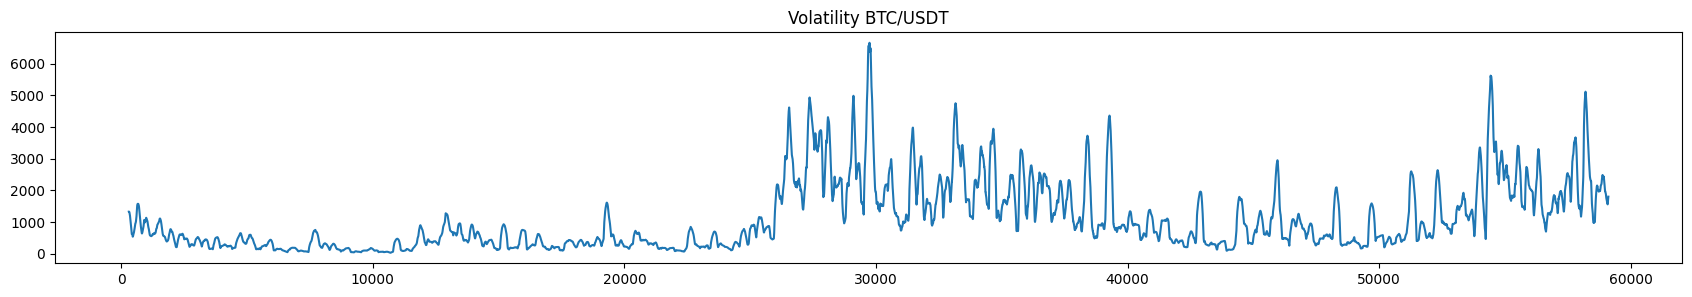

In [51]:
ohlcv["Vol"].plot(figsize=(21, 3))
plt.title("Volatility BTC/USDT")
plt.show()

### Унивариативный датасет

In [52]:
univariate_nixtla_dataset = pd.DataFrame(
    columns = ["ds", "y", "unique_id"]   
)

univariate_nixtla_dataset["ds"] = ohlcv["Date"]
univariate_nixtla_dataset["y"] = ohlcv["LogReturn"]
univariate_nixtla_dataset["unique_id"] = 1

In [53]:
univariate_nixtla_dataset

ds         y  unique_id
302   2018-01-23 22:00:00  0.005105          1
303   2018-01-23 23:00:00 -0.020421          1
304   2018-01-24 00:00:00 -0.021262          1
305   2018-01-24 01:00:00 -0.000737          1
306   2018-01-24 02:00:00  0.013968          1
...                   ...       ...        ...
59107 2024-09-14 15:00:00 -0.000786          1
59108 2024-09-14 16:00:00  0.001814          1
59109 2024-09-14 17:00:00 -0.001570          1
59110 2024-09-14 18:00:00 -0.001782          1
59111 2024-09-14 19:00:00  0.000916          1

[58222 rows x 3 columns]

In [54]:
train_univariate = univariate_nixtla_dataset[univariate_nixtla_dataset["ds"] <= "2024-06-01"]
test_univariate = univariate_nixtla_dataset[univariate_nixtla_dataset["ds"] > "2024-06-01"]

In [55]:
train_univariate.shape, test_univariate.shape

((55683, 3), (2539, 3))

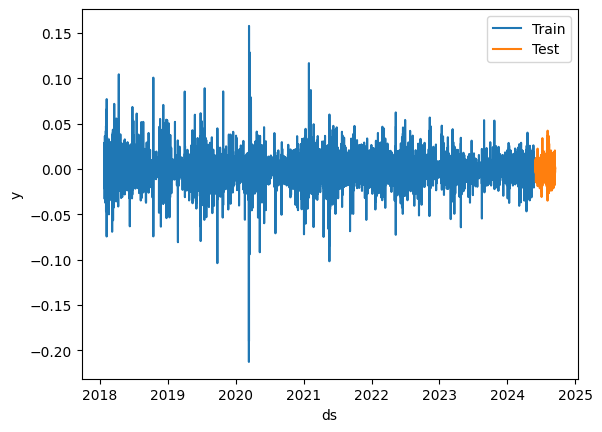

In [56]:
sns.lineplot(train_univariate, x="ds", y="y", label="Train")
sns.lineplot(test_univariate, x="ds", y="y", label="Test")
plt.show()

### Мультивариативный датасет

In [57]:
multivariate_nixtla_dataset = pd.DataFrame(
    columns = ["ds", "y", "unique_id"]   
)

multivariate_nixtla_dataset["ds"] = ohlcv["Date"]
multivariate_nixtla_dataset["y"] = ohlcv["Vol"]
multivariate_nixtla_dataset["unique_id"] = 1

In [58]:
multivariate_nixtla_dataset

ds            y  unique_id
302   2018-01-23 22:00:00  1327.321463          1
303   2018-01-23 23:00:00  1327.818280          1
304   2018-01-24 00:00:00  1327.876848          1
305   2018-01-24 01:00:00  1327.969277          1
306   2018-01-24 02:00:00  1326.614261          1
...                   ...          ...        ...
59107 2024-09-14 15:00:00  1769.307387          1
59108 2024-09-14 16:00:00  1777.824422          1
59109 2024-09-14 17:00:00  1785.321191          1
59110 2024-09-14 18:00:00  1792.325472          1
59111 2024-09-14 19:00:00  1799.737700          1

[58222 rows x 3 columns]

## Nixtla StatsForecast

In [69]:
season_length = 24 
horizon = len(test_univariate)

models = [
    ARCH(1), 
    ARCH(2),
    ARCH(12),
    ARCH(24),
    ARCH(48),
    GARCH(1,1),
    GARCH(1,3),
    GARCH(2,2),
    GARCH(3,1),
    GARCH(3,3),
    GARCH(12,12),
    GARCH(24,24),
    GARCH(48,48),
    Naive()    
]

In [70]:
sf = StatsForecast(#df=train_univariate,
                   models=models,
                   freq='h',
                   n_jobs=-1)

### Кросс валидация

In [71]:
crossvalidation_df = sf.cross_validation(df=train_univariate.iloc[-300:],
                                         h=50,
                                         step_size=10,
                                         n_windows=10)

In [72]:
crossvalidation_df

unique_id                  ds              cutoff         y   ARCH(1)  \
0            1 2024-05-26 05:00:00 2024-05-26 04:00:00  0.002349  0.016875   
1            1 2024-05-26 06:00:00 2024-05-26 04:00:00 -0.000547 -0.006747   
2            1 2024-05-26 07:00:00 2024-05-26 04:00:00  0.003504 -0.005541   
3            1 2024-05-26 08:00:00 2024-05-26 04:00:00 -0.002647 -0.011219   
4            1 2024-05-26 09:00:00 2024-05-26 04:00:00 -0.001095  0.009238   
..         ...                 ...                 ...       ...       ...   
495          1 2024-05-31 20:00:00 2024-05-29 22:00:00  0.000422 -0.041987   
496          1 2024-05-31 21:00:00 2024-05-29 22:00:00 -0.002054  0.012758   
497          1 2024-05-31 22:00:00 2024-05-29 22:00:00 -0.000905  0.138601   
498          1 2024-05-31 23:00:00 2024-05-29 22:00:00  0.000484  0.009048   
499          1 2024-06-01 00:00:00 2024-05-29 22:00:00  0.001581  0.040705   

      ARCH(2)  ARCH(12)  ARCH(24)  ARCH(48)  GARCH(1,1)  GARCH(1,3)  \
0    0.050107  0.003938  0.008613  0.004908    0.006833    0.014854   
1   -0.020700 -0.002395 -0.003796 -0.001844   -0.003593   -0.006138   
2   -0.018127 -0.001689 -0.003019 -0.001543   -0.002468   -0.004910   
3   -0.034089 -0.002950 -0.006060 -0.003089   -0.004711   -0.009913   
4    0.028256  0.003112  0.005777  0.002521    0.004354    0.008262   
..        ...       ...       ...       ...         ...         ...   
495 -0.025946 -0.004344 -0.001589 -0.005898   -0.016722   -0.020211   
496  0.007660  0.001833  0.000472  0.001866    0.005038    0.006126   
497  0.084282  0.030359  0.005697  0.019557    0.055159    0.066702   
498  0.004939  0.002176  0.000523  0.001681    0.003331    0.004262   
499  0.025369  0.004064  0.001345  0.005911    0.016206    0.019592   

     GARCH(2,2)  GARCH(3,1)  GARCH(3,3)  GARCH(12,12)  GARCH(24,24)  \
0      0.007225    0.010637    0.016152      0.007918      0.008733   
1     -0.003310   -0.004296   -0.006083     -0.005185     -0.003637   
2     -0.002540   -0.003739   -0.005252     -0.003493     -0.003002   
3     -0.004988   -0.007655   -0.010669     -0.006057     -0.006047   
4      0.004275    0.005955    0.008605      0.007152      0.005878   
..          ...         ...         ...           ...           ...   
495   -0.009920   -0.029793   -0.017222     -0.003151     -0.019717   
496    0.002773    0.008908    0.005152      0.001109      0.005387   
497    0.030536    0.092562    0.054186      0.013810      0.053250   
498    0.001939    0.005755    0.003313      0.001646      0.004121   
499    0.009953    0.029338    0.016913      0.003075      0.015773   

     GARCH(48,48)     Naive  
0        0.003821 -0.001365  
1       -0.001827 -0.001365  
2       -0.000952 -0.001365  
3       -0.001902 -0.001365  
4        0.001587 -0.001365  
..            ...       ...  
495     -0.006952 -0.000235  
496      0.002151 -0.000235  
497      0.024063 -0.000235  
498      0.001444 -0.000235  
499      0.007262 -0.000235  

[500 rows x 18 columns]

In [73]:
crossvalidation_df.columns

Index(['unique_id', 'ds', 'cutoff', 'y', 'ARCH(1)', 'ARCH(2)', 'ARCH(12)',
       'ARCH(24)', 'ARCH(48)', 'GARCH(1,1)', 'GARCH(1,3)', 'GARCH(2,2)',
       'GARCH(3,1)', 'GARCH(3,3)', 'GARCH(12,12)', 'GARCH(24,24)',
       'GARCH(48,48)', 'Naive'],
      dtype='object')

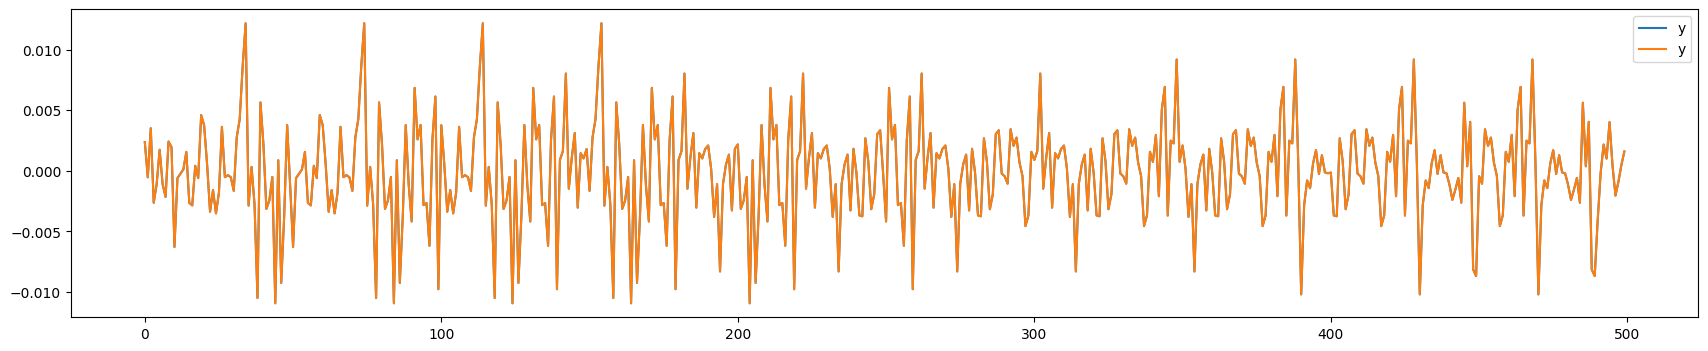

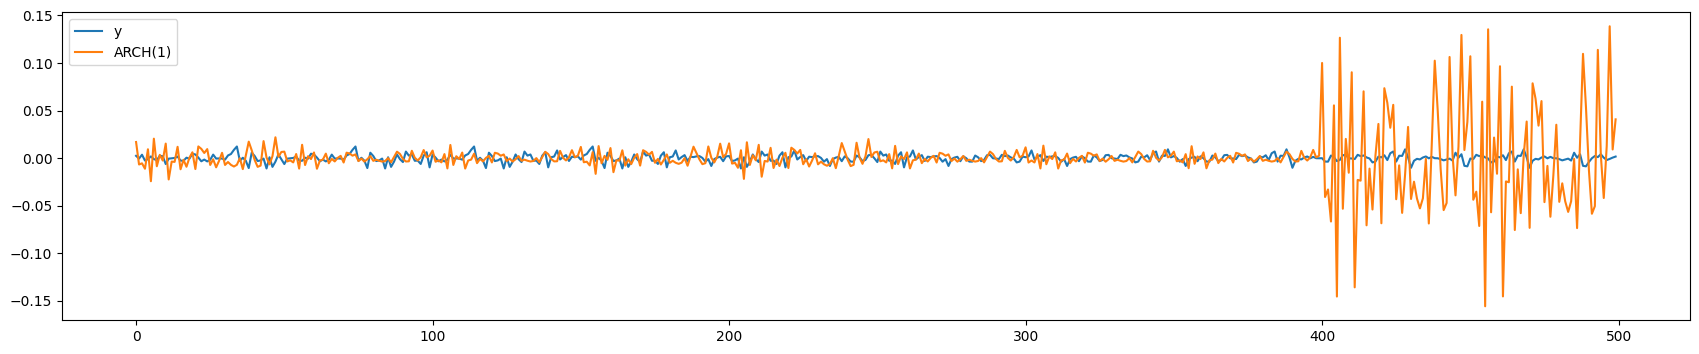

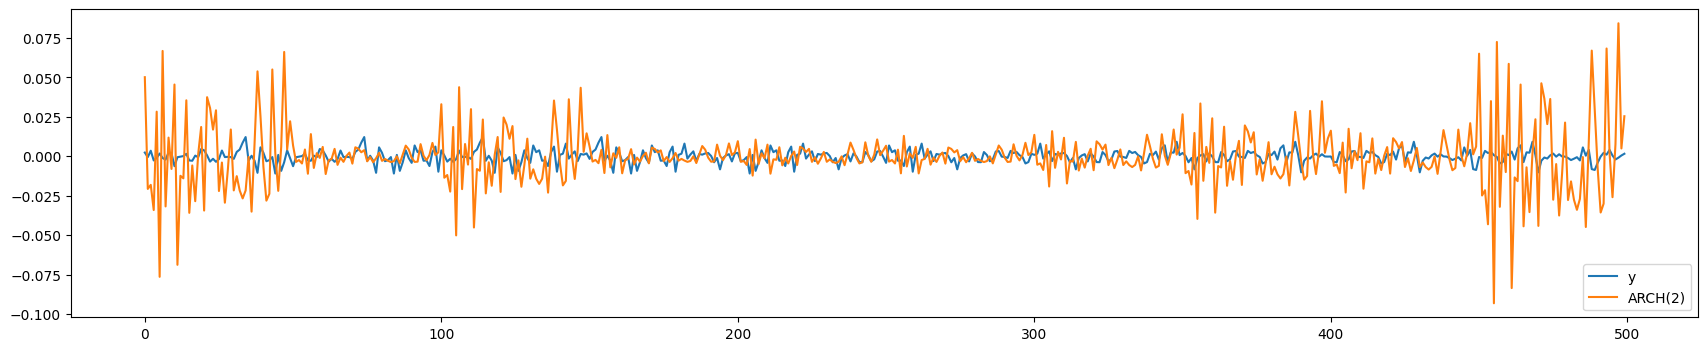

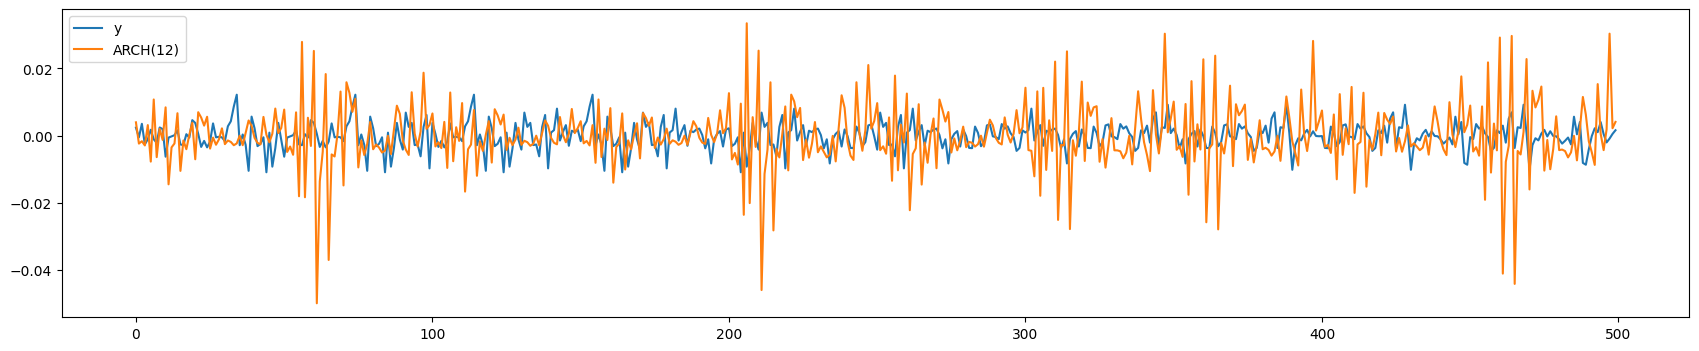

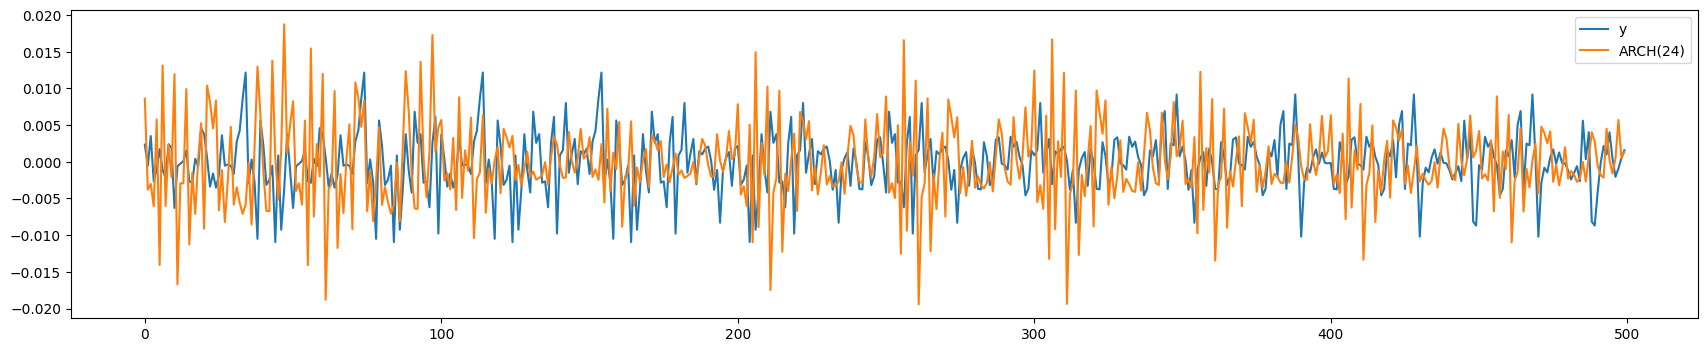

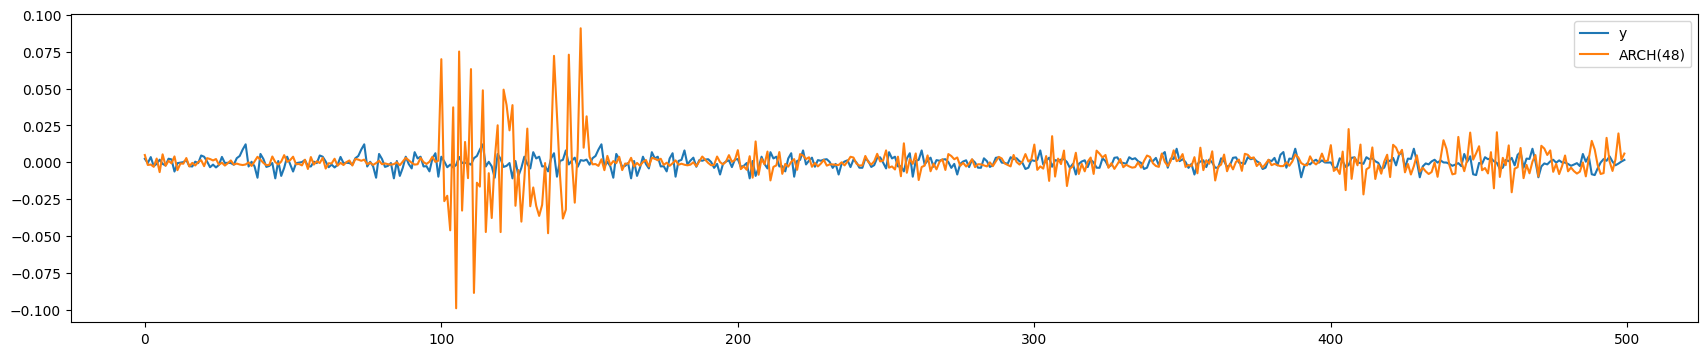

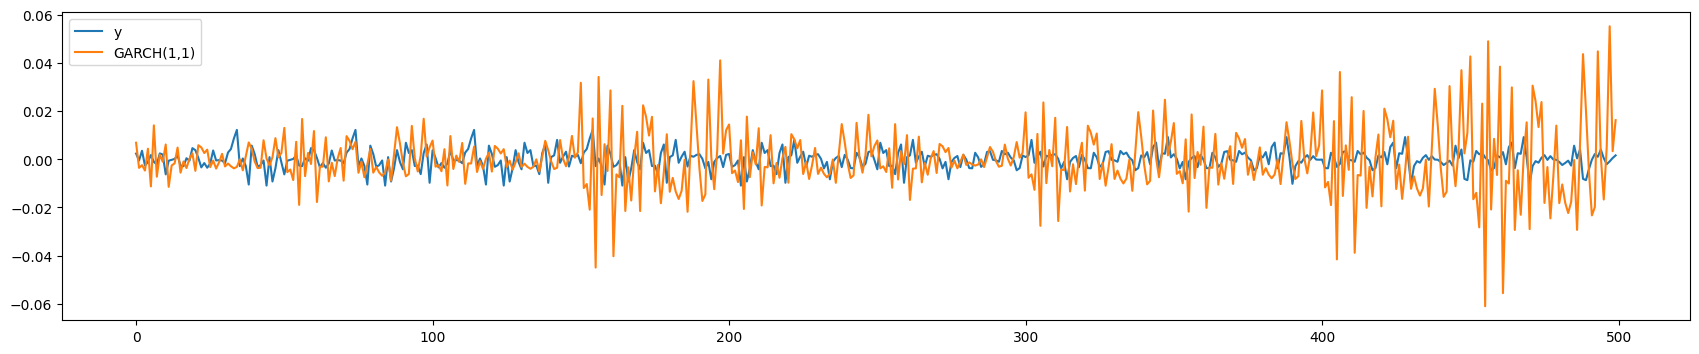

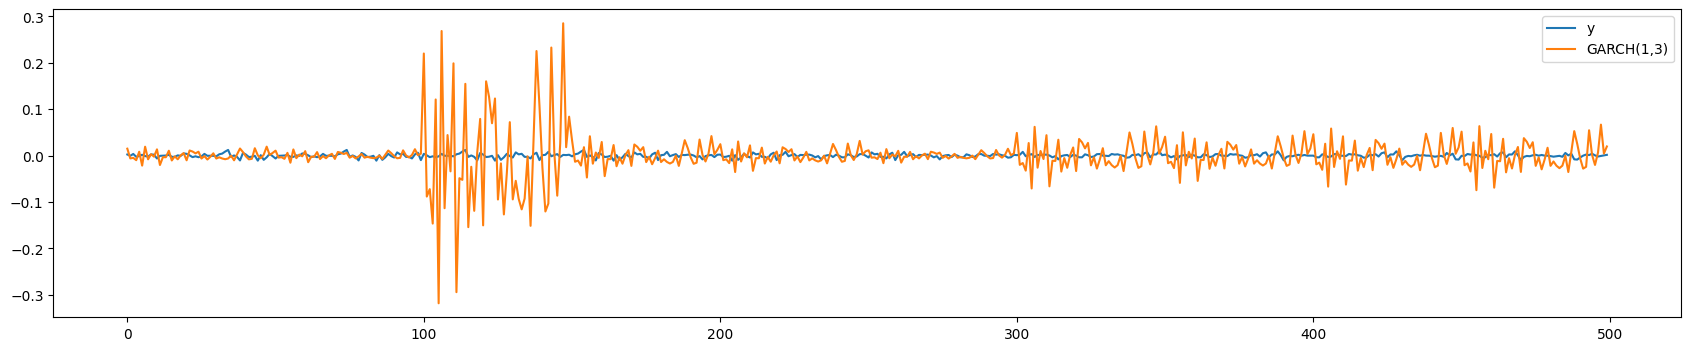

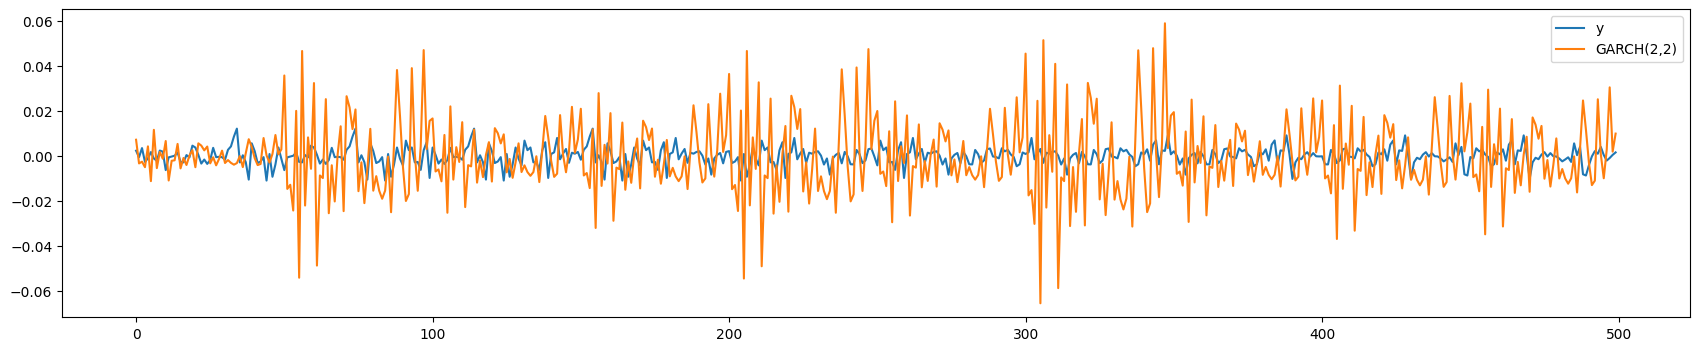

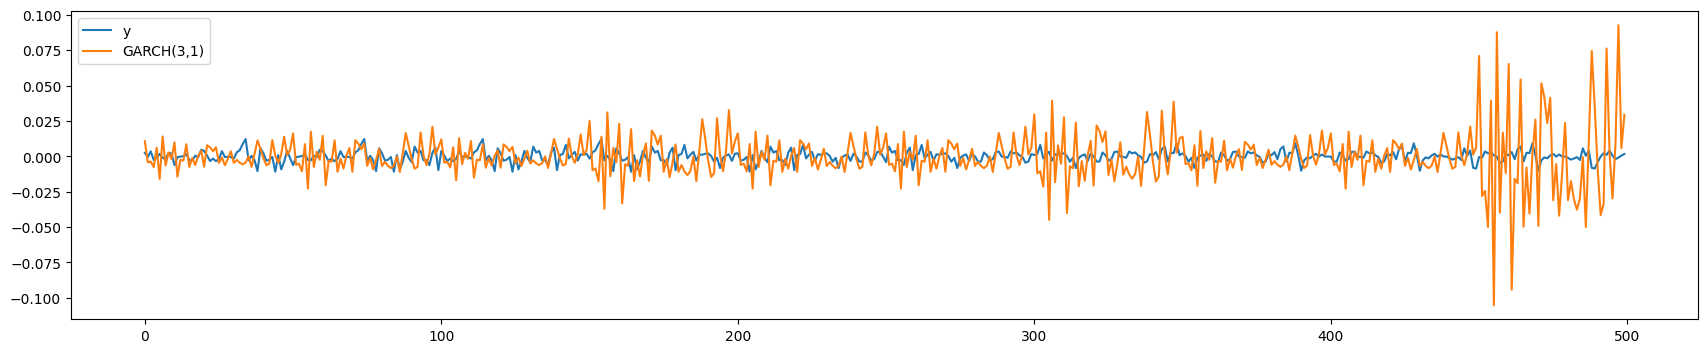

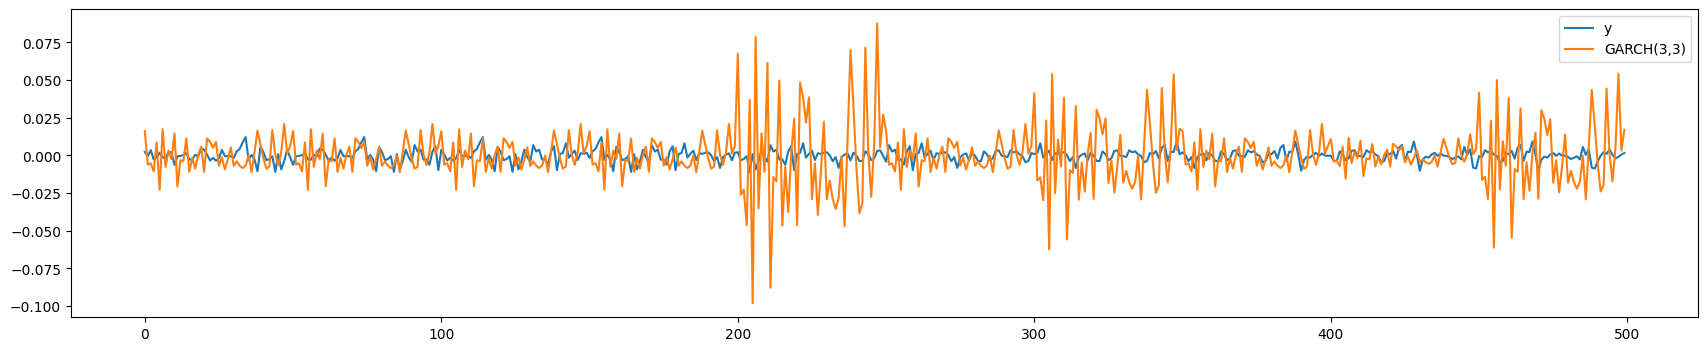

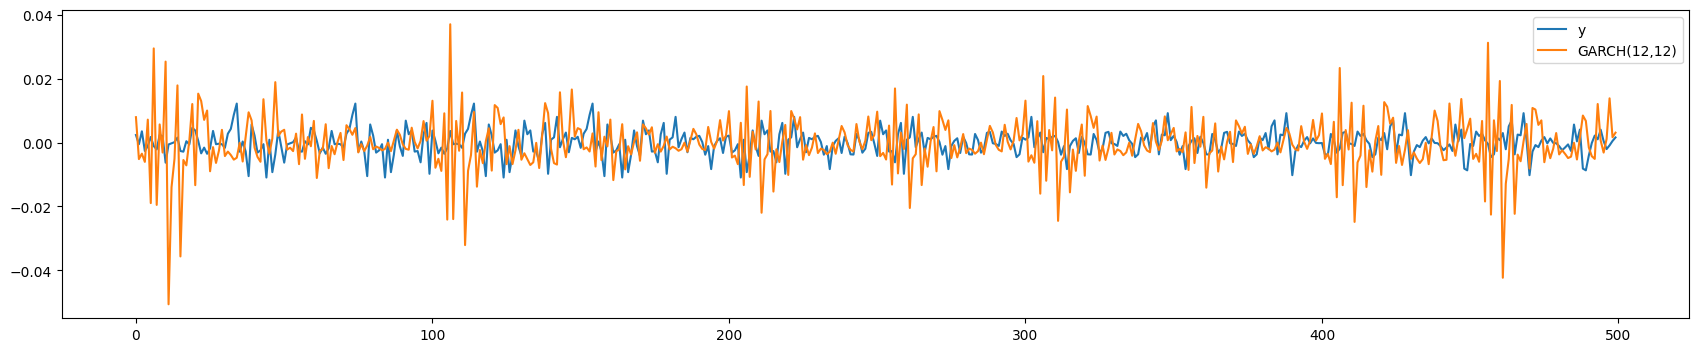

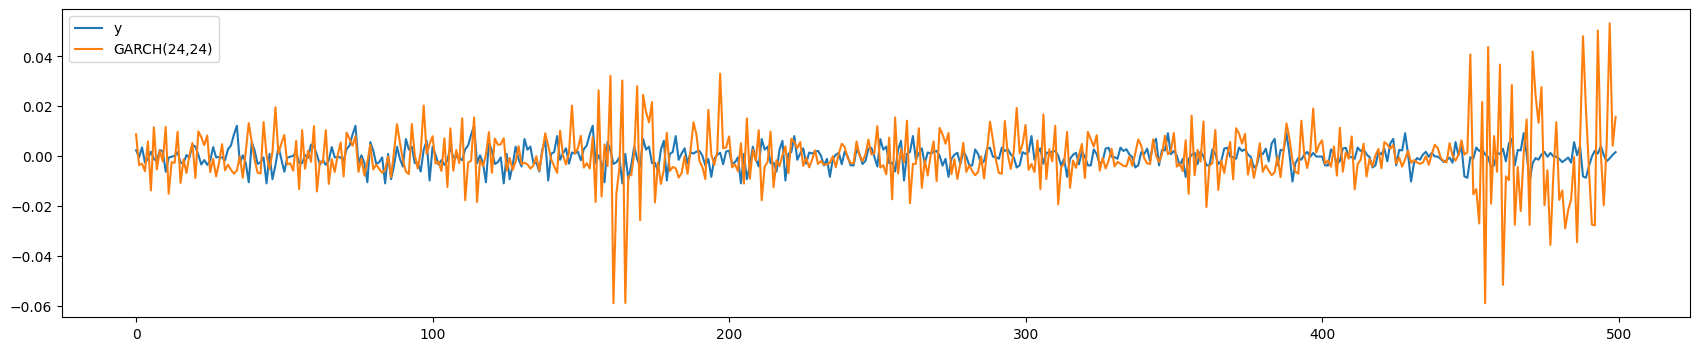

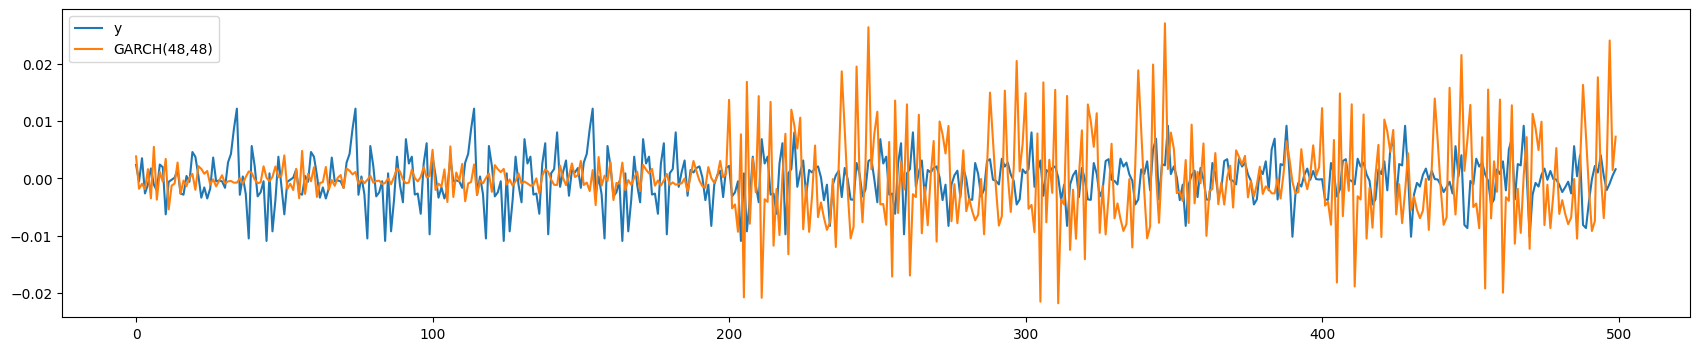

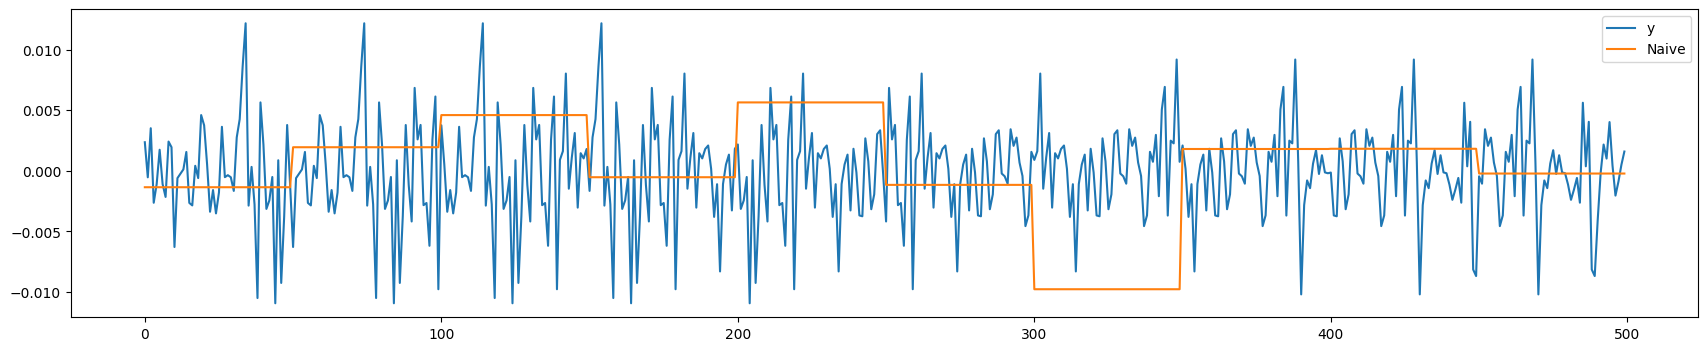

In [74]:
for i in crossvalidation_df.columns[3:]:
    crossvalidation_df.reset_index()[["y", i]].plot(figsize=(21, 4))
    plt.show()

В ARCH и GARCH моделт нельзя поставлять все точки данных, иначе прогноз будет сверх некорректным. Рекомендуется брать последние 200 - 300 точек данных. Лучше всего справляется ARCH модель с периодами: 18, 24, 36 на тренировочных данных

### Оптимизация гиперпараметров

In [103]:
def objective(trial):
    model = trial.suggest_categorical("model", ["ARCH", "GARCH"])

    if model == "ARCH":
        p = trial.suggest_int("p", 1, 96)
        models = [ARCH(p=p)]
    elif model == "GARCH":
        p = trial.suggest_int("p", 1, 96)
        q = trial.suggest_int("q", 1, 64)
        models = [GARCH(p=p, q=q)]

    sf = StatsForecast(#df=train_univariate[-300:],
                       models=models,
                       freq='h',
                       n_jobs=-1)

    sf.fit(train_univariate[-300:])

    forecasts = sf.predict(h=300)
    
    rmse = losses.rmse(test_univariate[:300]["y"].values, forecasts.iloc[:, -1].values)

    return rmse

In [104]:
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(seed=0))

[I 2024-09-14 20:02:32,755] A new study created in memory with name: no-name-98b58be3-defb-47b4-8aeb-8ddea6cf24c0


In [105]:
study.optimize(objective, n_trials=1000)

[I 2024-09-14 20:02:33,119] Trial 0 finished with value: 0.008196660208417028 and parameters: {'model': 'GARCH', 'p': 58, 'q': 35}. Best is trial 0 with value: 0.008196660208417028.
[I 2024-09-14 20:02:33,937] Trial 1 finished with value: 0.004151927944498848 and parameters: {'model': 'GARCH', 'p': 43, 'q': 58}. Best is trial 1 with value: 0.004151927944498848.
[I 2024-09-14 20:02:34,324] Trial 2 finished with value: 0.004053610035279608 and parameters: {'model': 'ARCH', 'p': 77}. Best is trial 2 with value: 0.004053610035279608.
[I 2024-09-14 20:02:34,914] Trial 3 finished with value: 0.004060085852261424 and parameters: {'model': 'GARCH', 'p': 89, 'q': 5}. Best is trial 2 with value: 0.004053610035279608.
[I 2024-09-14 20:02:35,249] Trial 4 finished with value: 0.004054738872770417 and parameters: {'model': 'ARCH', 'p': 80}. Best is trial 2 with value: 0.004053610035279608.
[I 2024-09-14 20:02:35,440] Trial 5 finished with value: 0.01185053960967121 and parameters: {'model': 'GARCH',

In [106]:
print("Best hyperparameters:", study.best_params)
print("Best RMSE:", study.best_value)

Best hyperparameters: {'model': 'GARCH', 'p': 84, 'q': 9}
Best RMSE: 0.004046060233376283


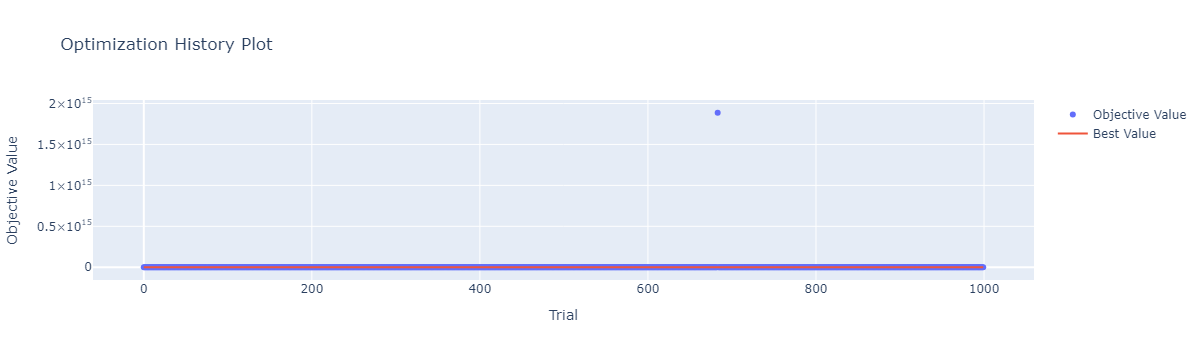

In [107]:
optuna.visualization.plot_optimization_history(study)

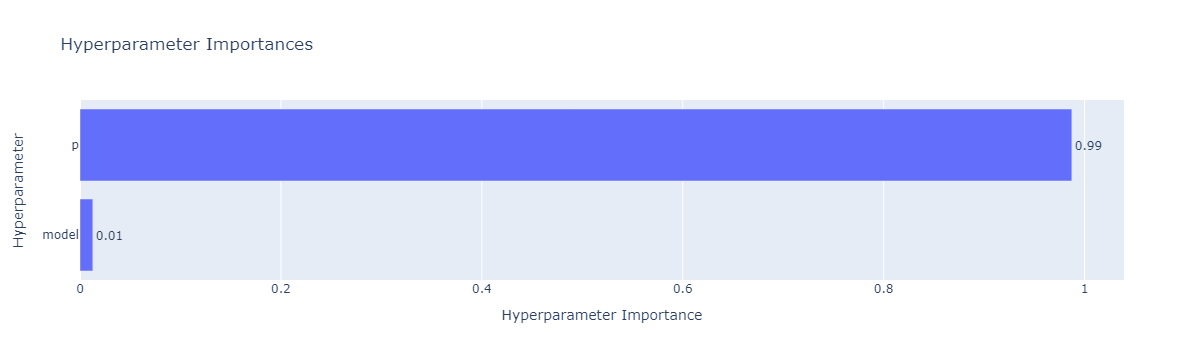

In [108]:
optuna.visualization.plot_param_importances(study)

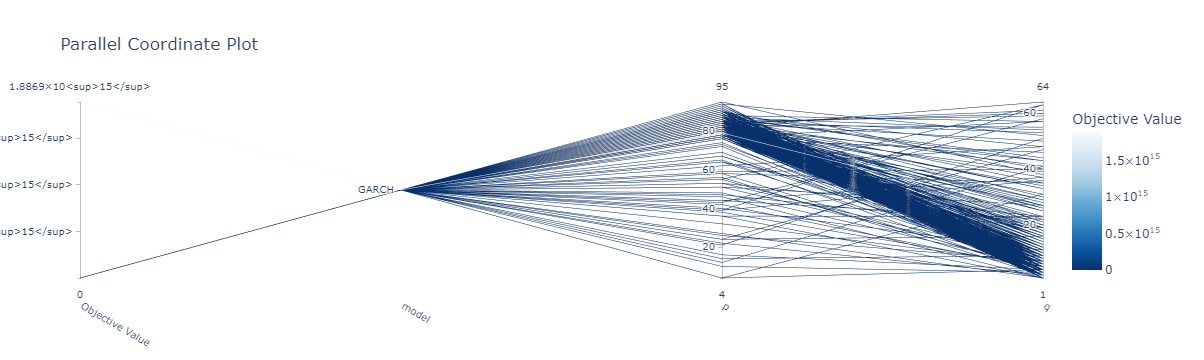

In [109]:
optuna.visualization.plot_parallel_coordinate(study)

In [110]:
optuna.visualization.plot_slice(study, params=["model", "p", "q"])

In [111]:
optuna.visualization.plot_edf(study)

### Выводы !TODO



## Nixtla MLForecast

### Кросс валидация

# Создание пайплайна